In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
import os
import pprint

%matplotlib inline
path=r"C:\Users\TIRTHA\Downloads\images\photo-1579546929662-711aa81148cf.jpg"

The type of this input is <class 'numpy.ndarray'>
Shape: (667, 1000, 3)


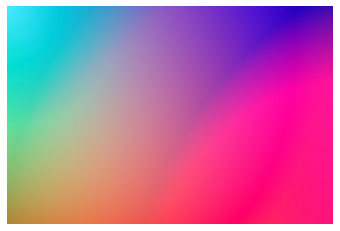

In [22]:
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(image)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.axis('off')
plt.imshow(image)



(3, 3, 3)
[[ 51 196 211]
 [148  97 187]
 [132  17 185]
 [135 196 166]
 [199 106 157]
 [246  21 154]
 [196 159 103]
 [241  84 113]
 [254  19 121]]
Wall time: 40.1 ms


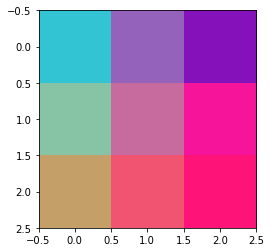

In [44]:
%%time
modified_image = cv2.resize(image, (3, 3), interpolation = cv2.INTER_AREA)
print(modified_image.shape)
plt.imshow(modified_image)
modified_image1=modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
print(modified_image1)

In [59]:
def get_nearest_colors(act_color,rest_color):
    all_dist=[]
    for rcolor in rest_color:
        rdiff=act_color[0]-rcolor[0]
        gdiff=act_color[1]-rcolor[1];
        bdiff=act_color[2]-rcolor[2];
        distance = rdiff**2 + gdiff**2 + bdiff**2
        all_dist.append(distance)
    print(act_color,all_dist)

In [60]:
value_list=[]
for i in range(len(modified_image1)):
    temp_list=modified_image1.tolist()
    temp_list.pop(i)
    get_nearest_colors(modified_image1[i],temp_list)
    
# print(modified_image1)

[ 51 196 211] [19786, 39278, 9081, 32920, 71899, 34058, 58248, 80638]
[148  97 187] [19786, 6660, 10411, 3582, 16469, 13204, 14294, 21676]
[132  17 185] [39278, 6660, 32411, 13194, 13973, 30984, 21554, 18984]
[135 196 166] [9081, 10411, 32411, 12277, 43090, 9059, 26589, 47515]
[199 106 157] [32920, 3582, 13194, 12277, 9443, 5734, 4184, 11890]
[246  21 154] [71899, 16469, 13973, 43090, 9443, 24145, 5675, 1157]
[196 159 103] [34058, 13204, 30984, 9059, 5734, 24145, 7750, 23288]
[241  84 113] [58248, 14294, 21554, 26589, 4184, 5675, 7750, 4458]
[254  19 121] [80638, 21676, 18984, 47515, 11890, 1157, 23288, 4458]


In [25]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [26]:
def get_image(image_path):
    image_path=image_path.replace("\\","/")
    print(image_path)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(image)
    plt.title("Inserted image : "+image_path.split("/")[-1])
    plt.show()
    return image

In [33]:
def color_extractor(image,number_of_colors,plot_pie=True,plot_cls_c=True):
    # resizing the image to get smaller size of image
    # k-means expect 2d data so reshaping the image
    modified_image_1 = cv2.resize(image, (2,2), interpolation = cv2.INTER_AREA)
    modified_image = modified_image_1.reshape(modified_image_1.shape[0]*modified_image_1.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_

    
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if plot_pie:
        plt.figure(figsize = (8, 6))
        plt.title("Pie chart of "+str(number_of_colors)+" dominent colors")
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        plt.show()
    if plot_cls_c:
        plt.figure(figsize = (6, 4))
        plt.title("Ploting clustering centers")
        for i in range(number_of_colors):
            plt.scatter(center_colors[i:i+1, 0], center_colors[i:i+1, 1], c=hex_colors[i], s=200, alpha=0.5, label = hex_colors[i]);
        plt.legend()
        plt.show()
    
        
    dom_color_index=np.argmax(np.array([val for val in counts.values()]))
    result={
        "number_of_colors":number_of_colors,
        "color_values":[val for val in counts.values()],
        "rgb_colors":rgb_colors,
        "hex colors":hex_colors,
        "dominant_color":{"index":dom_color_index,"color_in_rgb":rgb_colors[dom_color_index],"color_in_hex":hex_colors[dom_color_index]}
    }

    return result




C:/Users/TIRTHA/Downloads/images/photo-1579546929662-711aa81148cf.jpg


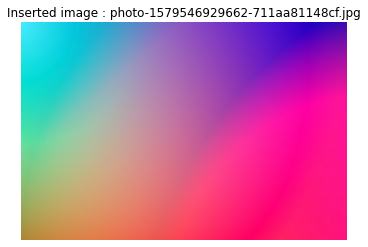

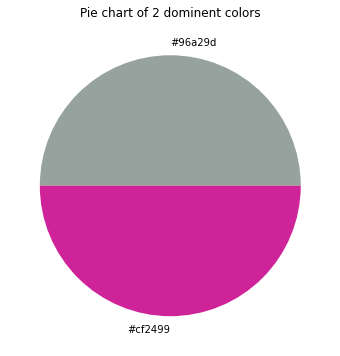

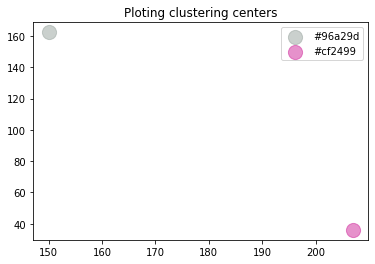

Wall time: 800 ms


In [38]:
%%time
report=color_extractor(get_image(path),2,True,True)

In [29]:
pprint.pprint(report)

{'color_values': [28364, 43818, 44052, 72364, 51402],
 'dominant_color': {'color_in_hex': '#9ba9a7',
                    'color_in_rgb': array([155.8646347 , 169.18607306, 167.04006849]),
                    'index': 3},
 'hex colors': ['#d38177', '#27cdcf', '#f81b86', '#9ba9a7', '#862db9'],
 'number_of_colors': 5,
 'rgb_colors': [array([211.23345713, 129.25821067, 119.29871468]),
                array([ 39.89654199, 205.01584333, 207.73168666]),
                array([248.99265396,  27.76199945, 134.92227285]),
                array([155.8646347 , 169.18607306, 167.04006849]),
                array([134.48953718,  45.02862791, 185.69581714])]}


In [30]:
# !explorer .
